In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


### Define the Structure height 

In [68]:
A=[18]
B=5*[10]
C=10*[14]
D=14*[10]
H=A+B+C+D

number_of_stories= len(H)

print(f'Structure has %.f  stories' % (number_of_stories))


Structure has 30  stories


### Structure Parameters 

In [3]:
Cv=0.1
k=2 # Assuming T>2 sec
w_floor=[961]
W=30*w_floor

H=np.array(H)
W=np.array(W)
W.sum()

28830

In [4]:
h=np.cumsum(H)


array([ 18,  28,  38,  48,  58,  68,  82,  96, 110, 124, 138, 152, 166,
       180, 194, 208, 218, 228, 238, 248, 258, 268, 278, 288, 298, 308,
       318, 328, 338, 348], dtype=int32)

array([961, 961, 961, 961, 961, 961, 961, 961, 961, 961, 961, 961, 961,
       961, 961, 961, 961, 961, 961, 961, 961, 961, 961, 961, 961, 961,
       961, 961, 961, 961])

### 12.8.3 Vertical Distribution of Seismic Forces Per ASCE 7-16 :

In [6]:
w_h_k=np.sum(W*(h**k)) # Sigm(wi*hi^k)

1329312860

### Per 12.8-12 

In [7]:
C_vx=np.array([(W[i]*(h[i]**k))/w_h_k for i in range(len(W))])

In [9]:
F_x=C_vx*0.1

In [10]:
Floors=np.arange(1,31)

In [13]:
Shear=np.cumsum(F_x[::-1])[::-1]

In [16]:
Shear_load= Shear*W.sum()

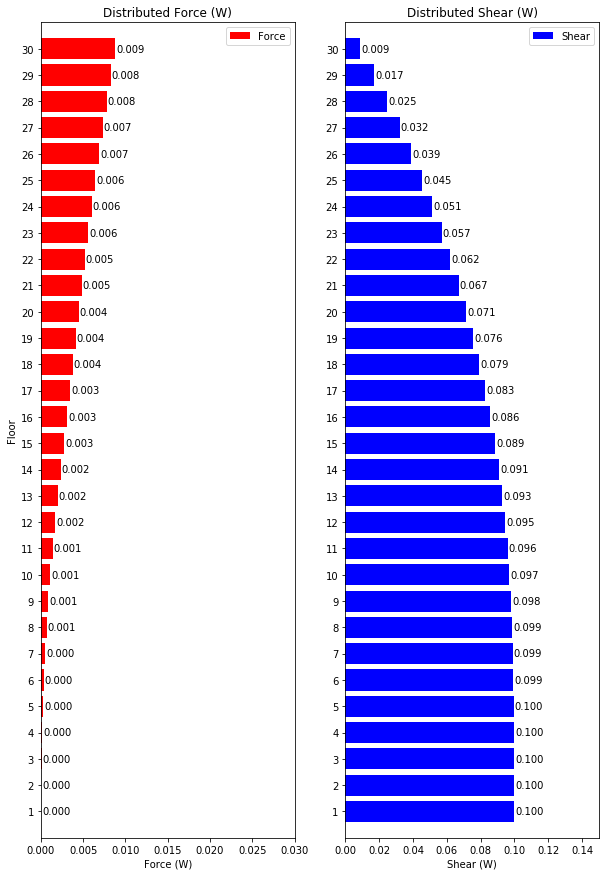

In [59]:
# plt.figure()
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,15))
ax[0].barh(Floors, F_x, label='Force',height=0.8 , color='r', tick_label=Floors)
ax[1].barh(Floors, Shear, label='Shear',height=0.8 , color='b', tick_label=Floors, )
ax[0].legend(loc='upper right')
ax[1].legend()
ax[0].set_ylabel('Floor')
ax[0].set_xlabel('Force (W)')
ax[1].set_xlabel('Shear (W)')
ax[0].set_ylim([0,31])
ax[1].set_ylim([0,31])
ax[0].set_xlim([0,0.03])
ax[1].set_xlim([0,0.15])

ax[0].set_title('Distributed Force (W)')
ax[1].set_title('Distributed Shear (W)')

for i in range(0,2): 
    rects = ax[i].patches
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 1
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.3f}".format(x_value)
    # Create annotation
        ax[i].annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for
                                        # positive and negative values.

plt.savefig('Force_Shear Dist.png', dpi=300, bbox_inches='tight')